In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta
import seaborn as sns

In [2]:
bfw = pd.read_csv("data/Blue and fin whales Southern California 2014-2015 - Fastloc GPS data.csv")
bwe = pd.read_csv("data/Blue whales Eastern North Pacific 1993-2008 - Argos Data.csv")
spw = pd.read_csv("data/Sperm whales Gulf of California 2007-2008-gps.csv")
dfs = [bfw,bwe,spw]

In [3]:
bfw['timestamp'] = pd.to_datetime(bfw['timestamp'])
bwe['timestamp'] = pd.to_datetime(bwe['timestamp'])
spw['timestamp'] = pd.to_datetime(spw['timestamp'])

In [4]:
def plot(df,outlier=False,deltamax = None,zoom=1):
    """ 
    Plot the trajectory of each animal from df. 
  
    Parameters: 
        df: Dataframe of GPS data
        outlier: Boolean to print outlier or not (default False)
        deltamax: Timedelta indicating the maximum time interval for an animal to be printed
        zoom: Float to change the height and width of the map
    
    """
    lat_0 = df['location-lat'].mean()
    long_0 = df['location-long'].mean()
    ids = df['individual-local-identifier'].unique()
    plt.figure(figsize=(10,10))
    plt.title(df['study-name'][0])
    map = Basemap( projection='aeqd', width=2400000/zoom,height=2400000/zoom,lat_0 =lat_0, lon_0 =long_0,resolution='h')
    map.drawcoastlines() 
    map.drawcountries()
    map.drawrivers(color='aqua',zorder=2,linewidth=0.2)
    map.drawmapboundary(fill_color='aqua',zorder=0)
    map.fillcontinents(color='coral',lake_color='aqua',zorder=1)
    count = 0
    for id in ids:
        animal = df[df['individual-local-identifier']==id]
        if outlier is False:
            animal = animal[animal['manually-marked-outlier'].isna()]
        delta = animal['timestamp'].diff()
        if not deltamax or delta.max() < deltamax:
            count+=1
            x,y = map(animal['location-long'],animal['location-lat'])
            map.plot(x,y,zorder=2,alpha=0.75)
    print(count,'whales :')
    plt.show()

26 whales :


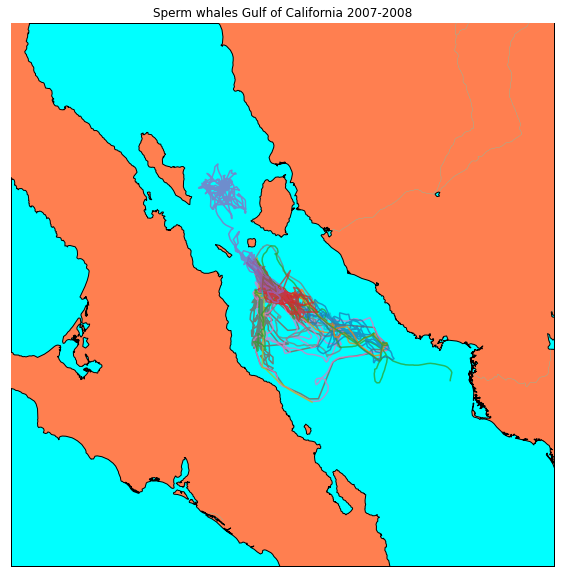

In [5]:
plot(spw,zoom=5)

13 whales :


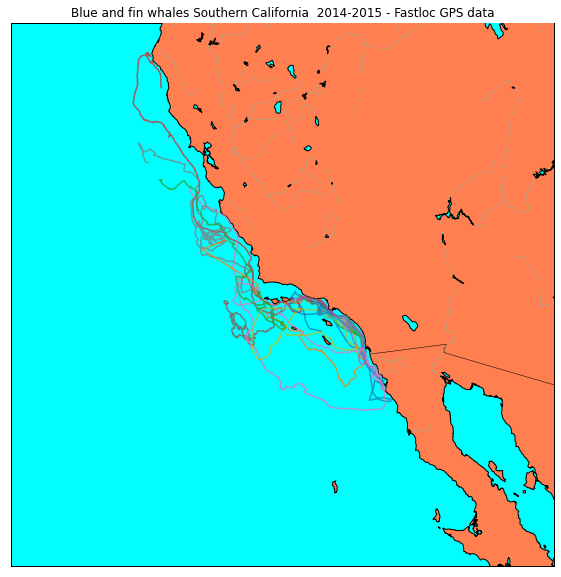

In [6]:
plot(bfw,zoom=1.5)

143 whales :


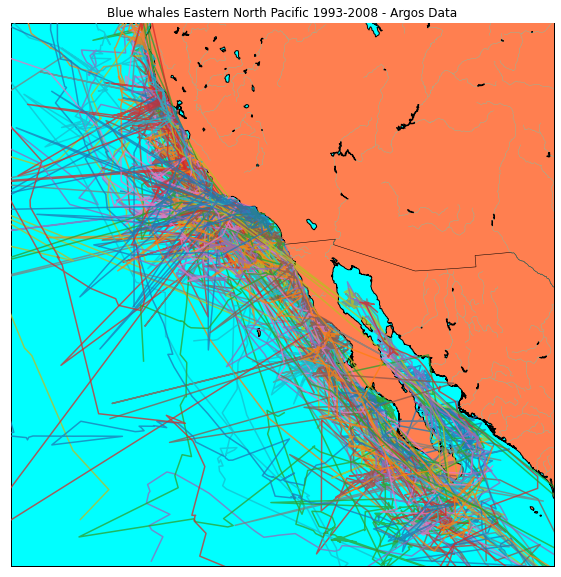

In [7]:
plot(bwe)

39 whales :


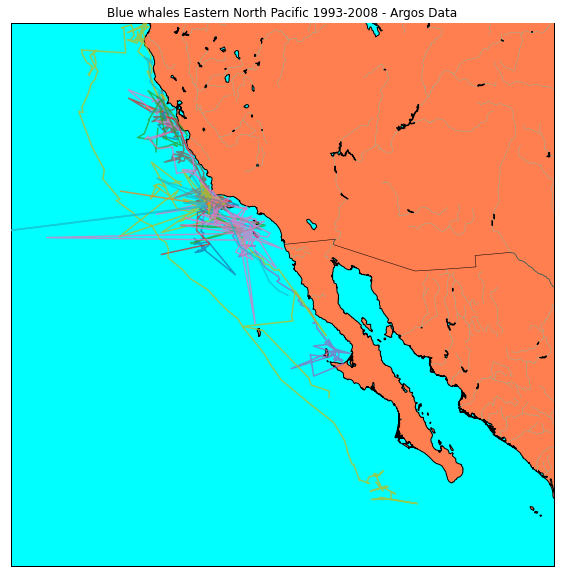

In [8]:
plot(bwe, deltamax=timedelta(days = 2))

In [9]:
def distdelta(df):
    """
    Plot histogram of maximum time interval of each animal.
    
    """
    
    ids = df['individual-local-identifier'].unique()
    delta=[]
    for id in ids:
        ani = df[df['individual-local-identifier']==id]
        d = ani['timestamp'].diff()/ np.timedelta64(1, 'D')
        delta.append(d.max())
    plt.figure(figsize=(10,10))
    ax = sns.displot(delta).ax
    ax.set_xlabel('Days')
    ax.set_title(df['study-name'][0])

<Figure size 720x720 with 0 Axes>

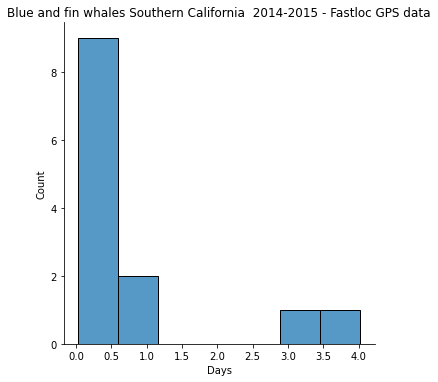

<Figure size 720x720 with 0 Axes>

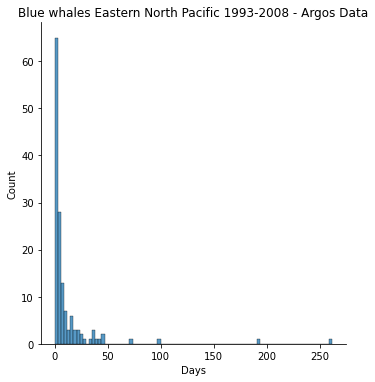

<Figure size 720x720 with 0 Axes>

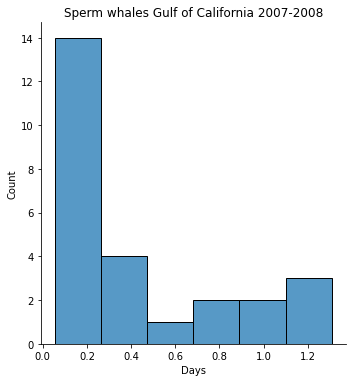

In [10]:
for df in dfs:
    distdelta(df)